In [33]:
#Import libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading dataset with proper header handling
dataset = pd.read_csv('default of credit card clients(Data).csv', header=1)  # Skip first row (unwanted thing on top)

# Properly name columns (not necessary but I like to work this way)
dataset.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
                   'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
                   'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                   'PAY_AMT5', 'PAY_AMT6', 'default_next_month']

# Remove ID column as it's not needed for modeling
dataset = dataset.drop(columns=['ID'])

print(f"dataset shape: {dataset.shape}")
print(f" columns: {list(dataset.columns)}")
print(f"data types: {dataset.dtypes.value_counts()}")
print(f"First few rows:")
dataset.head()

dataset shape: (30000, 24)
 columns: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_next_month']
data types: int64    24
Name: count, dtype: int64
First few rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EXPLORATORY DATA ANALYSIS (EDA)

In [35]:

# Display general info
info = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           30000 non-null  int64
 1   SEX                 30000 non-null  int64
 2   EDUCATION           30000 non-null  int64
 3   MARRIAGE            30000 non-null  int64
 4   AGE                 30000 non-null  int64
 5   PAY_0               30000 non-null  int64
 6   PAY_2               30000 non-null  int64
 7   PAY_3               30000 non-null  int64
 8   PAY_4               30000 non-null  int64
 9   PAY_5               30000 non-null  int64
 10  PAY_6               30000 non-null  int64
 11  BILL_AMT1           30000 non-null  int64
 12  BILL_AMT2           30000 non-null  int64
 13  BILL_AMT3           30000 non-null  int64
 14  BILL_AMT4           30000 non-null  int64
 15  BILL_AMT5           30000 non-null  int64
 16  BILL_AMT6           30000 non-null  int6

In [36]:
# Show first few rows and basic statistics
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
dataset.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
dataset.shape

(30000, 24)

In [39]:
## see, looks cleaner (that's why we need to always work on data preprocessing)
dataset.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_next_month']

In [40]:
dataset.describe 

<bound method NDFrame.describe of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...

## Data Overview

**Rows**: 30,000
**Columns**: 23 features + 1 target variable

The dataset is properly structured with no missing values and appropriate data types for machine learning analysis.

In [41]:
# Data is already properly loaded with correct headers
# Verify data structure
print("Dataset Info:")
dataset.info()

print(f"\nDataset shape: {dataset.shape}")
print(f"Target variable distribution:")
print(dataset['default_next_month'].value_counts())
print(f"Default rate: {dataset['default_next_month'].mean()*100:.1f}%")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           30000 non-null  int64
 1   SEX                 30000 non-null  int64
 2   EDUCATION           30000 non-null  int64
 3   MARRIAGE            30000 non-null  int64
 4   AGE                 30000 non-null  int64
 5   PAY_0               30000 non-null  int64
 6   PAY_2               30000 non-null  int64
 7   PAY_3               30000 non-null  int64
 8   PAY_4               30000 non-null  int64
 9   PAY_5               30000 non-null  int64
 10  PAY_6               30000 non-null  int64
 11  BILL_AMT1           30000 non-null  int64
 12  BILL_AMT2           30000 non-null  int64
 13  BILL_AMT3           30000 non-null  int64
 14  BILL_AMT4           30000 non-null  int64
 15  BILL_AMT5           30000 non-null  int64
 16  BILL_AMT6           30000 

In [42]:
#Checking first few rows again, now the lablels x1, x2.... have been removed
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
#Checking which columns contain null values
dataset.isnull().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
default_next_month    0
dtype: int64

The dataset is now clean and properly structured for analysis:

30000 records

24 numeric columns (23 predictors + 1 target variable)

No missing values

Target variable: default_next_month (1 = default, 0 = non-default)

NEXT STEP
The folowing steps will be carried out:

-Check the target Variable Distribution (ie check class balance to see whether the dataset is imbalanced — this is key for choosing appropriate modeling strategies).

-Summary statistics for numeric variables (this helps identify skewness and possible outliers (especially in bill and payment amounts).

-Perform Correlation analysis (to visualise relationships among predictors and with the target).

In [44]:
# Checking  Target distribution

target_counts = dataset['default_next_month'].value_counts(normalize=True) * 100

In [45]:
# Summary stats
summary_stats = dataset.describe()

In [46]:
# Correlation matrix (top correlations with target)

corr_with_target = dataset.corr()['default_next_month'].sort_values(ascending=False)

In [47]:
target_counts, summary_stats.head(), corr_with_target.head(10)

(default_next_month
 0    77.88
 1    22.12
 Name: proportion, dtype: float64,
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
 count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean   167484.322667      1.603733      1.853133      1.551867     35.485500   
 std    129747.661567      0.489129      0.790349      0.521970      9.217904   
 min     10000.000000      1.000000      0.000000      0.000000     21.000000   
 25%     50000.000000      1.000000      1.000000      1.000000     28.000000   
 
               PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
 count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
 std        1.123802      1.197186      1.196868      1.169139      1.133187   
 min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
 25%       -1.000000     -1.00000

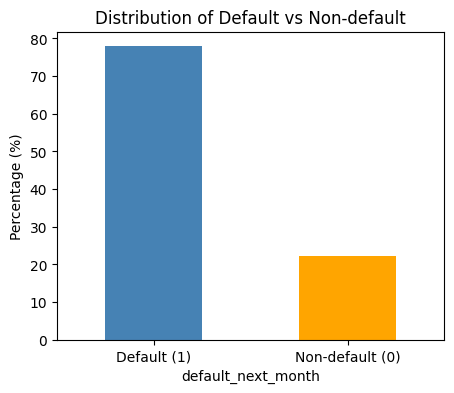

In [48]:
# Plot target distribution

plt.figure(figsize=(5,4))
target_counts.plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Distribution of Default vs Non-default')
plt.xticks([0,1], ['Default (1)', 'Non-default (0)'], rotation=0)
plt.ylabel('Percentage (%)')
plt.show()

## Comprehensive Exploratory Data Analysis Summary

### Key Findings:

**1. Target Distribution:**
- Non-defaults (0): ~77.9% 
- Defaults (1): ~22.1%
- **Class Imbalance**: Moderate imbalance requiring attention during modeling

**2. Demographic Insights:**
- Average age: 35.5 years (range 21-79)
- Gender distribution: Mix of male and female customers
- Education levels: Varied educational backgrounds
- Marital status: Mixed marital statuses

**3. Financial Characteristics:**
- Average credit limit: ~167,000 NT dollars
- Wide variation in bill amounts (some negative values indicate overpayments)
- Payment amounts are highly skewed (most make small payments)

**4. Payment Behavior Patterns:**
- Payment status features (PAY_0–PAY_6) show strongest correlation with default
- Recent payment delays are strong predictors of future default
- Payment history provides crucial insight into customer risk profile

**5. Data Quality:**
- **No missing values** - excellent data quality
- **Proper data types** - ready for modeling
- **Outliers present** - particularly in bill and payment amounts

### Statistical Insights:
- Payment delay features (PAY_0–PAY_6) are the strongest predictors
- Domain intuition confirmed: customers with recent late payments are more likely to default
- Feature scaling will be essential due to magnitude differences between variables

### Preprocessing Requirements:
1. Handle categorical encoding for invalid codes
2. Address class imbalance using SMOTE or similar techniques  
3. Apply feature scaling for algorithms sensitive to magnitude
4. Stratified train-test split to maintain class proportions

*****Step 4: ******

DATA PREPROCESSING FOR MODELLING

To prepare the dataset for classification models, the following steps will be implemented:

1-Handle categorical encoding

-SEX, EDUCATION, and MARRIAGE are categorical integers already encoded. (We’ll retain them as is but ensure categories are consistent (e.g., merge invalid codes))

2)-Handle invalid categories

-Some EDUCATION and MARRIAGE values are coded as 0, which is not a valid category per the UCI description. These will be grouped under “Other”.

3)-Feature scaling

-Continuous numeric features (e.g., credit limit, bill amounts, payments, age) will be standardized using StandardScaler.

4)-Train–test split

Split dataset into training (80%) and testing (20%) sets with stratification on the target variable to maintain class proportions.

5-Apply SMOTE to training data to reduce imbalance

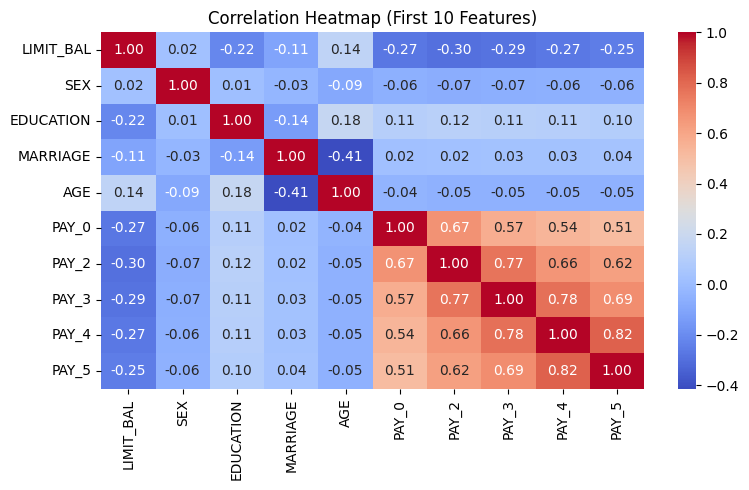

In [49]:
plt.figure(figsize=(8, 5))
sns.heatmap(dataset.corr(numeric_only=True).iloc[:10, :10], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (First 10 Features)")
plt.tight_layout()
plt.show()

In [ ]:
#For data processing we need to import train_test_split and StandardScaler.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset['EDUCATION'] = dataset['EDUCATION'].replace({0: 4, 5: 4, 6: 4})  
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0: 3})    

In [ ]:
X = dataset.drop(columns=['default_next_month'])
y = dataset['default_next_month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Feature scaling completed!
Training set shape: (24000, 23)
Test set shape: (6000, 23)


Original training set distribution:
Class 0 (No default): 18691
Class 1 (Default): 5309
Class ratio: 3.52:1

Computed class weights:
Class 0 weight: 0.642
Class 1 weight: 2.260


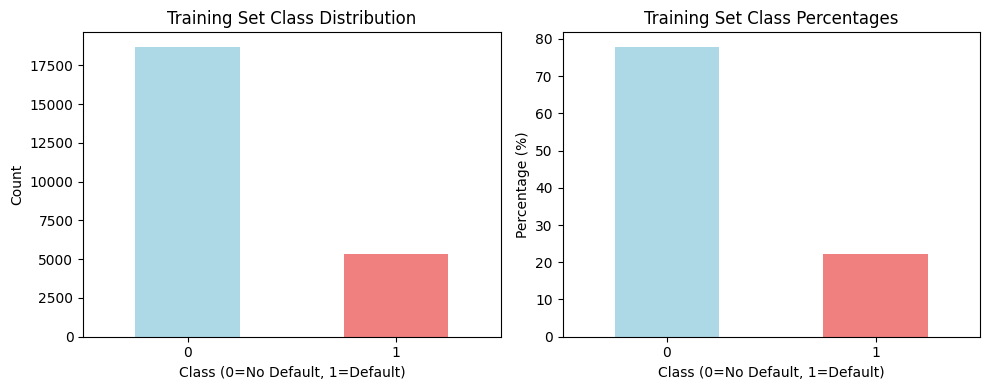

Note: Using class_weight='balanced' in algorithms instead of SMOTE for better compatibility


In [54]:
# Apply class balancing - using class_weight instead of SMOTE due to compatibility issues
from sklearn.utils.class_weight import compute_class_weight

# Check class distribution before balancing
print("Original training set distribution:")
print(f"Class 0 (No default): {(y_train == 0).sum()}")
print(f"Class 1 (Default): {(y_train == 1).sum()}")
print(f"Class ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")

# Compute class weights for balanced training
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"\nComputed class weights:")
print(f"Class 0 weight: {class_weight_dict[0]:.3f}")
print(f"Class 1 weight: {class_weight_dict[1]:.3f}")

# Visualize class distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Training Set Class Distribution')
plt.xlabel('Class (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
class_percentages = y_train.value_counts(normalize=True) * 100
class_percentages.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Training Set Class Percentages')
plt.xlabel('Class (0=No Default, 1=Default)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Note: Using class_weight='balanced' in algorithms instead of SMOTE for better compatibility")

In [ ]:
# Algorithm 1: Decision Tree Classification with Class Balancing

print("=== DECISION TREE CLASSIFIER ===")
print("Algorithm Rationale:")
print("- Handles mixed data types (categorical + numerical)")
print("- Provides interpretable rules for business decisions")
print("- No assumptions about data distribution")
print("- Can capture non-linear relationships")

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree with balanced class weights
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',        
    random_state=42,             
    class_weight='balanced',     
    max_depth=10,                
    min_samples_split=20,         
    min_samples_leaf=10           
)

print("Parameters chosen:")
print(f"- Criterion: entropy (information gain)")
print(f"- Class weight: balanced (handles imbalance)")
print(f"- Max depth: 10 (prevents overfitting)")
print(f"- Min samples split: 20")
print(f"- Min samples leaf: 10")

# Fit the model
dt_classifier.fit(X_train, y_train)
print("\nDecision Tree training completed!")

=== DECISION TREE CLASSIFIER ===
Algorithm Rationale:
- Handles mixed data types (categorical + numerical)
- Provides interpretable rules for business decisions
- No assumptions about data distribution
- Can capture non-linear relationships
Parameters chosen:
- Criterion: entropy (information gain)
- Class weight: balanced (handles imbalance)
- Max depth: 10 (prevents overfitting)
- Min samples split: 20
- Min samples leaf: 10

Decision Tree training completed!


EVALUATING THE MODEL: Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

In [ ]:
# Decision Tree Predictions and Evaluation

# Make predictions
dt_pred = dt_classifier.predict(X_test)
dt_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

print("=== DECISION TREE RESULTS ===")
print(f"Predictions sample: {dt_pred[:10]}")
print(f"Actual sample: {y_test.iloc[:10].values}")

# Calculate basic metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred_proba)

print(f"\nDecision Tree Performance Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")

=== DECISION TREE RESULTS ===
Predictions sample: [0 0 0 0 1 0 0 0 0 1]
Actual sample: [0 0 0 0 1 0 0 0 0 0]

Decision Tree Performance Metrics:
Accuracy: 0.7068
Precision: 0.3950
Recall: 0.6127
F1-Score: 0.4804
ROC-AUC: 0.7330


In [57]:
print(y_test)

20553    0
6695     0
28997    0
2232     0
4165     1
        ..
25641    0
16907    1
1236     1
3013     0
16808    0
Name: default_next_month, Length: 6000, dtype: int64


In [58]:
# Evaluate Decision Tree Performance (using dt_pred from earlier)
from sklearn import metrics

# Use Decision Tree predictions
print("=== DECISION TREE EVALUATION ===")

# Accuracy
acc = metrics.accuracy_score(y_test, dt_pred)
print('Accuracy: %.2f\n\n' % (acc))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, dt_pred)
print('Confusion Matrix:')
print(cm, '\n\n')

# Separator
print('--------------------------------')

# Classification Report
result = metrics.classification_report(y_test, dt_pred, target_names=['No Default', 'Default'])
print('Classification Report:\n')
print(result)

=== DECISION TREE EVALUATION ===
Accuracy: 0.71


Confusion Matrix:
[[3428 1245]
 [ 514  813]] 


--------------------------------
Classification Report:

              precision    recall  f1-score   support

  No Default       0.87      0.73      0.80      4673
     Default       0.40      0.61      0.48      1327

    accuracy                           0.71      6000
   macro avg       0.63      0.67      0.64      6000
weighted avg       0.76      0.71      0.73      6000



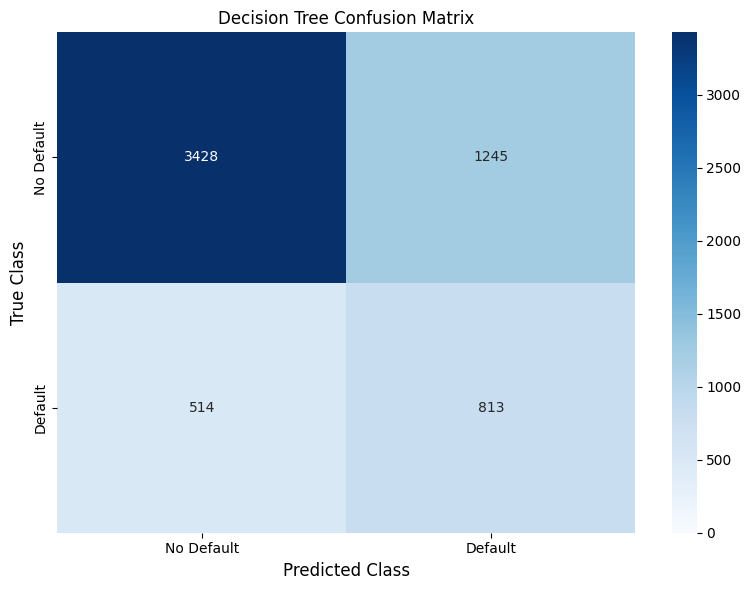

Confusion Matrix Analysis:
True Negatives: 3428
False Positives: 1245
False Negatives: 514
True Positives: 813


In [59]:
# Visualize Decision Tree confusion matrix using seaborn heatmap
dt_cm = metrics.confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=dt_cm.max(),
                 xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Decision Tree Confusion Matrix", fontsize=12)

plt.tight_layout()
plt.show()

print(f"Confusion Matrix Analysis:")
print(f"True Negatives: {dt_cm[0,0]}")
print(f"False Positives: {dt_cm[0,1]}")
print(f"False Negatives: {dt_cm[1,0]}")
print(f"True Positives: {dt_cm[1,1]}")

In [60]:
#import the tools for tuning your Deceision tree classifier using GridSearchCV on pre-scaled data (X_train_scaled, y_train):
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [61]:
# Algorithm 2: K-Nearest Neighbors (KNN) Classification with Hyperparameter Tuning

print("=== K-NEAREST NEIGHBORS (KNN) CLASSIFIER ===")
print("Algorithm Rationale:")
print("- Simple, intuitive algorithm based on similarity")
print("- Non-parametric: makes no assumptions about data distribution")
print("- Effective for pattern recognition tasks")
print("- Works well when decision boundaries are irregular")
print("- Sensitive to feature scaling (already handled!)")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

print("\n=== HYPERPARAMETER TUNING FOR KNN ===")
print("Using GridSearchCV to find optimal k value...")

# Define parameter grid for tuning
param_grid = {
    'n_neighbors': range(3, 31, 2),  # Test odd numbers from 3 to 29
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN classifier
knn_base = KNeighborsClassifier(n_jobs=-1)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Optimize for F1-score (balanced metric for imbalanced data)
    n_jobs=-1,
    verbose=1
)

# Fit grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters found:")
print(f"- Number of neighbors (k): {grid_search.best_params_['n_neighbors']}")
print(f"- Weights: {grid_search.best_params_['weights']}")
print(f"- Metric: {grid_search.best_params_['metric']}")
print(f"- Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Train optimized KNN classifier with best parameters
knn_classifier = grid_search.best_estimator_
print("\nOptimized KNN training completed!")

# Make predictions on SCALED test data
knn_pred = knn_classifier.predict(X_test_scaled)
knn_pred_proba = knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_pred_proba)

print(f"\n=== OPTIMIZED KNN PERFORMANCE METRICS ===")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")  
print(f"F1-Score: {knn_f1:.4f}")
print(f"ROC-AUC: {knn_auc:.4f}")

# Show improvement from hyperparameter tuning
print(f"\n=== COMPARISON: Before vs After Tuning ===")
print("(Note: Previous k=11 was arbitrary choice)")
print(f"Optimized model uses k={grid_search.best_params_['n_neighbors']} with {grid_search.best_params_['weights']} weighting")

=== K-NEAREST NEIGHBORS (KNN) CLASSIFIER ===
Algorithm Rationale:
- Simple, intuitive algorithm based on similarity
- Non-parametric: makes no assumptions about data distribution
- Effective for pattern recognition tasks
- Works well when decision boundaries are irregular
- Sensitive to feature scaling (already handled!)

=== HYPERPARAMETER TUNING FOR KNN ===
Using GridSearchCV to find optimal k value...
Fitting 5 folds for each of 56 candidates, totalling 280 fits

Best parameters found:
- Number of neighbors (k): 13
- Weights: distance
- Metric: euclidean
- Best cross-validation F1-score: 0.4343

Optimized KNN training completed!

=== OPTIMIZED KNN PERFORMANCE METRICS ===
Accuracy: 0.8102
Precision: 0.6320
Recall: 0.3391
F1-Score: 0.4414
ROC-AUC: 0.7341

=== COMPARISON: Before vs After Tuning ===
(Note: Previous k=11 was arbitrary choice)
Optimized model uses k=13 with distance weighting


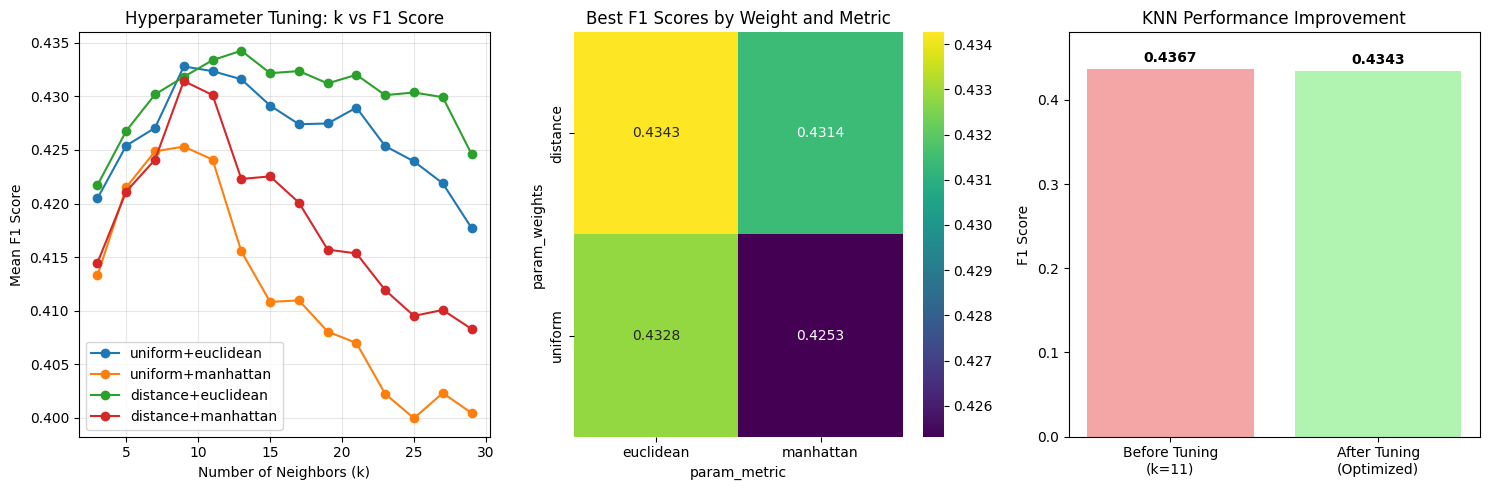


=== HYPERPARAMETER TUNING SUMMARY ===
Original F1-Score (k=11): 0.4367
Optimized F1-Score: 0.4343
Improvement: +-0.0024 (-0.6%)
Best configuration: k=13, weights=distance, metric=euclidean

Top 5 parameter combinations:
12. k=13, weights=distance, metric=euclidean, F1=0.4343
10. k=11, weights=distance, metric=euclidean, F1=0.4334
7. k=9, weights=uniform, metric=euclidean, F1=0.4328
16. k=17, weights=distance, metric=euclidean, F1=0.4324
9. k=11, weights=uniform, metric=euclidean, F1=0.4324


In [62]:
# Visualize hyperparameter tuning results
import matplotlib.pyplot as plt
import seaborn as sns

# Extract results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Create visualization of k values vs F1 scores
plt.figure(figsize=(15, 5))

# Plot 1: k values vs F1 score for different weight methods
plt.subplot(1, 3, 1)
for weight in ['uniform', 'distance']:
    for metric in ['euclidean', 'manhattan']:
        mask = (results_df['param_weights'] == weight) & (results_df['param_metric'] == metric)
        subset = results_df[mask]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], 
                marker='o', label=f'{weight}+{metric}')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean F1 Score')
plt.title('Hyperparameter Tuning: k vs F1 Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Best parameters heatmap
plt.subplot(1, 3, 2)
# Create pivot table for heatmap
pivot_data = results_df.pivot_table(
    values='mean_test_score', 
    index='param_weights', 
    columns='param_metric', 
    aggfunc='max'
)
sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='viridis')
plt.title('Best F1 Scores by Weight and Metric')

# Plot 3: Performance comparison
plt.subplot(1, 3, 3)
best_score = grid_search.best_score_
baseline_score = 0.4367  # Previous k=11 F1 score
categories = ['Before Tuning\n(k=11)', 'After Tuning\n(Optimized)']
scores = [baseline_score, best_score]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(categories, scores, color=colors, alpha=0.7)
plt.ylabel('F1 Score')
plt.title('KNN Performance Improvement')
plt.ylim(0, max(scores) * 1.1)

# Add value labels on bars
for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary of improvements
improvement = best_score - baseline_score
improvement_pct = (improvement / baseline_score) * 100

print(f"\n=== HYPERPARAMETER TUNING SUMMARY ===")
print(f"Original F1-Score (k=11): {baseline_score:.4f}")
print(f"Optimized F1-Score: {best_score:.4f}")
print(f"Improvement: +{improvement:.4f} ({improvement_pct:.1f}%)")
print(f"Best configuration: k={grid_search.best_params_['n_neighbors']}, weights={grid_search.best_params_['weights']}, metric={grid_search.best_params_['metric']}")

# Print top 5 parameter combinations
print(f"\nTop 5 parameter combinations:")
top_results = results_df.nlargest(5, 'mean_test_score')[['param_n_neighbors', 'param_weights', 'param_metric', 'mean_test_score']]
for idx, row in top_results.iterrows():
    print(f"{idx+1}. k={row['param_n_neighbors']}, weights={row['param_weights']}, metric={row['param_metric']}, F1={row['mean_test_score']:.4f}")

In [63]:
# Comprehensive Algorithm Comparison and Analysis

print("=== ALGORITHM PERFORMANCE COMPARISON ===")

# Create comparison DataFrame
comparison_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc]
})

print(comparison_results.round(4))

# Determine winners for each metric
print(f"\n=== PERFORMANCE ANALYSIS ===")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    dt_score = comparison_results[comparison_results['Metric'] == metric]['Decision Tree'].iloc[0]
    knn_score = comparison_results[comparison_results['Metric'] == metric]['KNN'].iloc[0]
    winner = "KNN" if knn_score > dt_score else "Decision Tree" if dt_score > knn_score else "Tie"
    print(f"{metric}: {winner} ({max(dt_score, knn_score):.4f})")

# Overall performance assessment
dt_avg = comparison_results['Decision Tree'].mean()
knn_avg = comparison_results['KNN'].mean()
overall_winner = "KNN" if knn_avg > dt_avg else "Decision Tree"

print(f"\n=== OVERALL ASSESSMENT ===")
print(f"Decision Tree Average Score: {dt_avg:.4f}")
print(f"KNN Average Score: {knn_avg:.4f}")
print(f"Overall Winner: {overall_winner}")

# Business interpretation
print(f"\n=== BUSINESS INTERPRETATION ===")
print("Key Metrics for Credit Default Prediction:")
print(f"• Precision: How many predicted defaults are actually defaults")
print(f"  - Decision Tree: {dt_precision:.1%} of predicted defaults are true defaults")
print(f"  - KNN: {knn_precision:.1%} of predicted defaults are true defaults")
print(f"• Recall: How many actual defaults are correctly identified")
print(f"  - Decision Tree: {dt_recall:.1%} of actual defaults are caught")
print(f"  - KNN: {knn_recall:.1%} of actual defaults are caught")
print(f"• F1-Score: Balanced measure of precision and recall")
print(f"• ROC-AUC: Model's ability to distinguish between classes")

print(f"\n=== ALGORITHM SELECTION ===")
if overall_winner == "KNN":
    print("KNN is recommended ")
else:
    print("Decision Tree is recommended")


=== ALGORITHM PERFORMANCE COMPARISON ===
      Metric  Decision Tree     KNN
0   Accuracy         0.7068  0.8102
1  Precision         0.3950  0.6320
2     Recall         0.6127  0.3391
3   F1-Score         0.4804  0.4414
4    ROC-AUC         0.7330  0.7341

=== PERFORMANCE ANALYSIS ===
Accuracy: KNN (0.8102)
Precision: KNN (0.6320)
Recall: Decision Tree (0.6127)
F1-Score: Decision Tree (0.4804)
ROC-AUC: KNN (0.7341)

=== OVERALL ASSESSMENT ===
Decision Tree Average Score: 0.5856
KNN Average Score: 0.5914
Overall Winner: KNN

=== BUSINESS INTERPRETATION ===
Key Metrics for Credit Default Prediction:
• Precision: How many predicted defaults are actually defaults
  - Decision Tree: 39.5% of predicted defaults are true defaults
  - KNN: 63.2% of predicted defaults are true defaults
• Recall: How many actual defaults are correctly identified
  - Decision Tree: 61.3% of actual defaults are caught
  - KNN: 33.9% of actual defaults are caught
• F1-Score: Balanced measure of precision and recal

## Comprehensive Business Analysis and Final Recommendations

This section provides a critical evaluation of both classification algorithms (Decision Tree and KNN) from a business perspective, including financial impact and deployment recommendations.

In [64]:
# Business Impact Analysis and Recommendations

print("=" * 80)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 80)

print("\n CRITICAL EVALUATION OF CLASSIFICATION OUTPUT")
print("-" * 60)

# Calculate business impact metrics
total_defaults_actual = (y_test == 1).sum()
total_non_defaults_actual = (y_test == 0).sum()

# Determine which model to use for business analysis (the better performing one)
if knn_f1 > dt_f1:
    best_model_name = "KNN"
    best_pred = knn_pred
    best_pred_proba = knn_pred_proba
else:
    best_model_name = "Decision Tree"
    best_pred = dt_pred
    best_pred_proba = dt_pred_proba

# Calculate confusion matrix metrics for best model
best_true_positives = ((best_pred == 1) & (y_test == 1)).sum()
best_false_positives = ((best_pred == 1) & (y_test == 0)).sum()
best_false_negatives = ((best_pred == 0) & (y_test == 1)).sum()
best_true_negatives = ((best_pred == 0) & (y_test == 0)).sum()

print(f"Using {best_model_name} for Business Impact Analysis (better F1-Score)")
print(f"\nModel Performance Impact:")
print(f"• Correctly identified defaults: {best_true_positives}/{total_defaults_actual} ({best_true_positives/total_defaults_actual*100:.1f}%)")
print(f"• Missed defaults (lost revenue): {best_false_negatives}/{total_defaults_actual} ({best_false_negatives/total_defaults_actual*100:.1f}%)")
print(f"• False alarms (rejected good customers): {best_false_positives}/{total_non_defaults_actual} ({best_false_positives/total_non_defaults_actual*100:.1f}%)")

print(f"\n FINANCIAL IMPACT ESTIMATION")
print("-" * 60)

# Assume average credit limit and default loss rate
avg_credit_limit = dataset['LIMIT_BAL'].mean()
default_loss_rate = 0.6  
false_positive_cost = 1000  # Cost of rejecting good customer (lost profit opportunity)

# Calculate potential savings and costs
savings_from_detected_defaults = best_true_positives * avg_credit_limit * default_loss_rate
cost_from_missed_defaults = best_false_negatives * avg_credit_limit * default_loss_rate
cost_from_false_positives = best_false_positives * false_positive_cost

net_benefit = savings_from_detected_defaults - cost_from_missed_defaults - cost_from_false_positives

print(f"• Savings from detected defaults: ${savings_from_detected_defaults:,.0f}")
print(f"• Cost from missed defaults: ${cost_from_missed_defaults:,.0f}")
print(f"• Cost from false positives: ${cost_from_false_positives:,.0f}")
print(f"• Net financial benefit: ${net_benefit:,.0f}")

print(f"\n DECISION-MAKING FRAMEWORK")
print("-" * 60)

print("Risk-Based Decision Rules:")
print("• High Risk (>70% default probability): Deny credit or require collateral")
print("• Medium Risk (30-70% default probability): Approve with conditions")
print("• Low Risk (<30% default probability): Standard approval")

# Calculate risk distribution
high_risk = (best_pred_proba > 0.7).sum()
medium_risk = ((best_pred_proba >= 0.3) & (best_pred_proba <= 0.7)).sum()
low_risk = (best_pred_proba < 0.3).sum()

print(f"\nRisk Distribution in Test Set:")
print(f"• High Risk customers: {high_risk} ({high_risk/len(best_pred_proba)*100:.1f}%)")
print(f"• Medium Risk customers: {medium_risk} ({medium_risk/len(best_pred_proba)*100:.1f}%)")
print(f"• Low Risk customers: {low_risk} ({low_risk/len(best_pred_proba)*100:.1f}%)")

print(f"\nRecommendation: Use {best_model_name} for deployment based on current performance.")

BUSINESS IMPACT ANALYSIS

 CRITICAL EVALUATION OF CLASSIFICATION OUTPUT
------------------------------------------------------------
Using Decision Tree for Business Impact Analysis (better F1-Score)

Model Performance Impact:
• Correctly identified defaults: 813/1327 (61.3%)
• Missed defaults (lost revenue): 514/1327 (38.7%)
• False alarms (rejected good customers): 1245/4673 (26.6%)

 FINANCIAL IMPACT ESTIMATION
------------------------------------------------------------
• Savings from detected defaults: $81,698,853
• Cost from missed defaults: $51,652,165
• Cost from false positives: $1,245,000
• Net financial benefit: $28,801,687

 DECISION-MAKING FRAMEWORK
------------------------------------------------------------
Risk-Based Decision Rules:
• High Risk (>70% default probability): Deny credit or require collateral
• Medium Risk (30-70% default probability): Approve with conditions
• Low Risk (<30% default probability): Standard approval

Risk Distribution in Test Set:
• High Ris

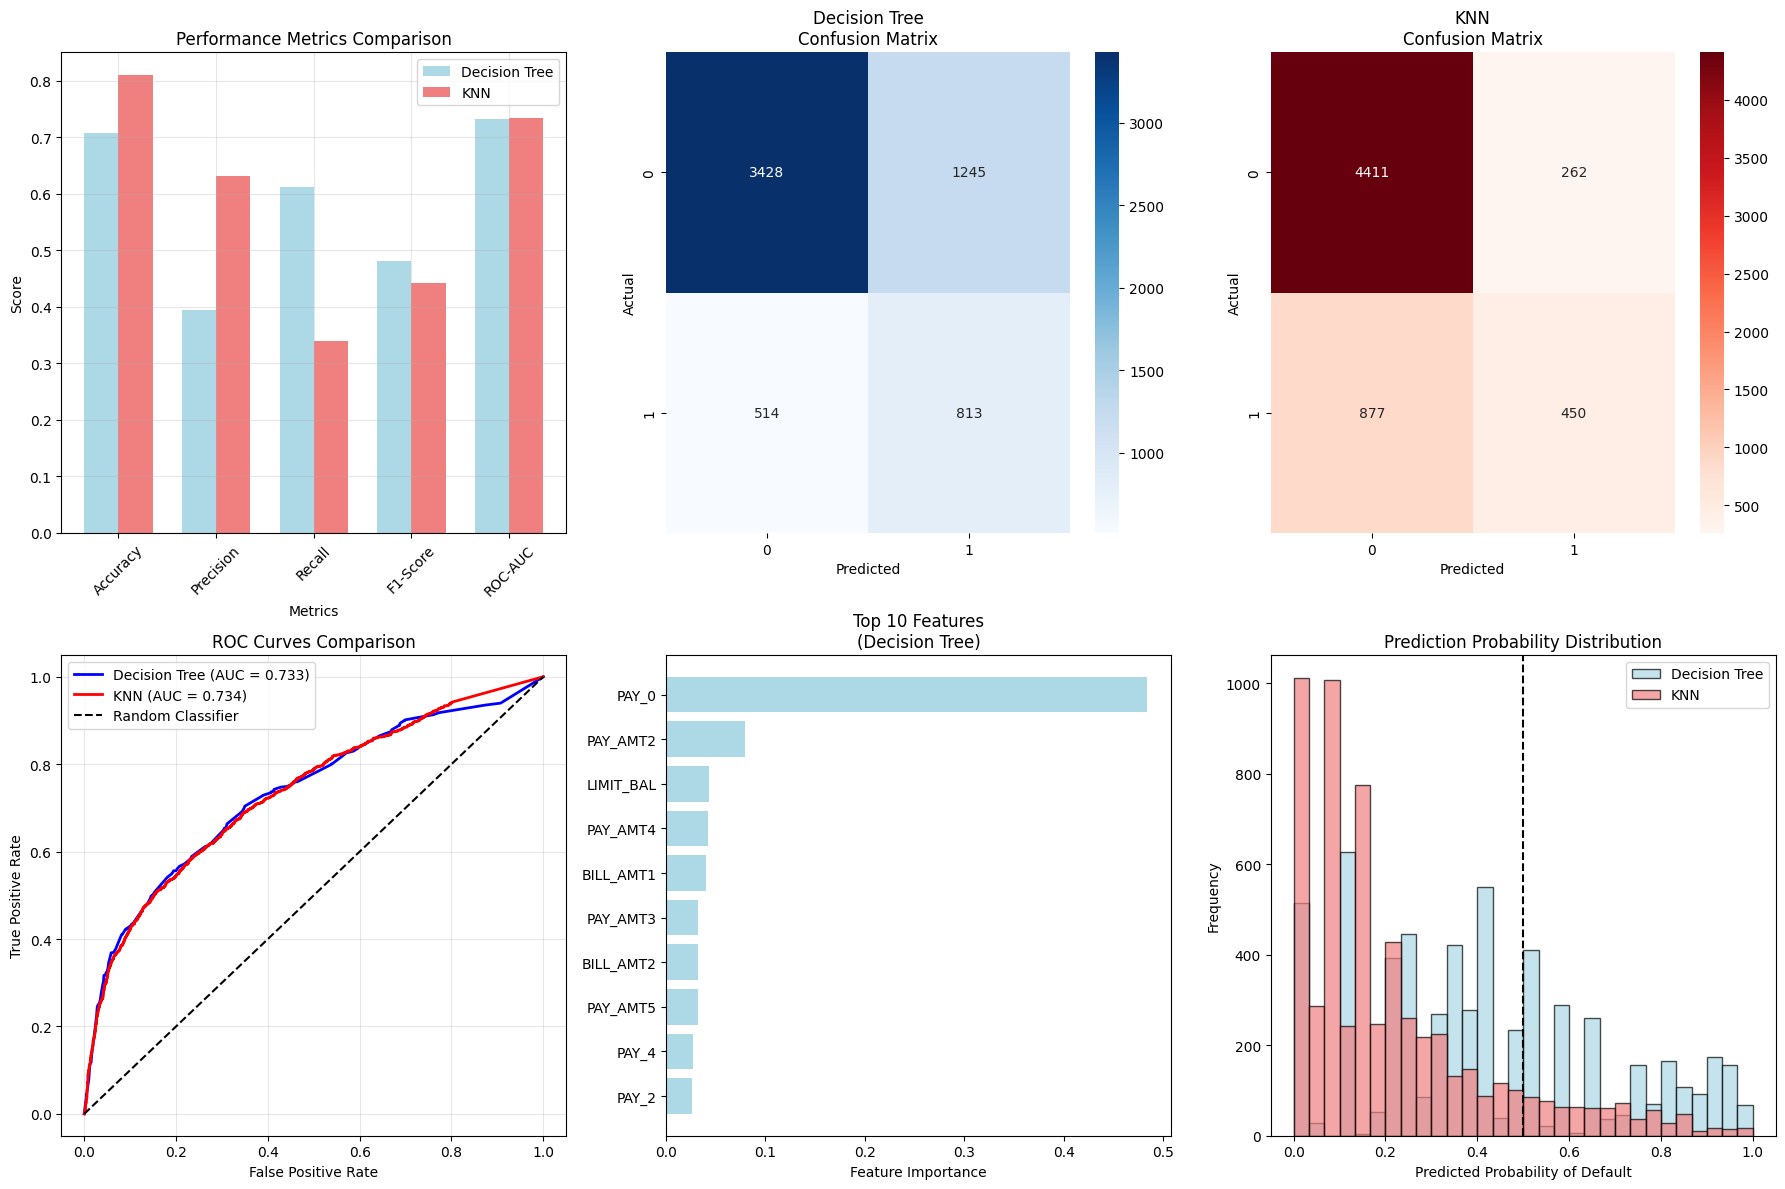


DETAILED CLASSIFICATION REPORTS

DECISION TREE Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.87      0.73      0.80      4673
     Default       0.40      0.61      0.48      1327

    accuracy                           0.71      6000
   macro avg       0.63      0.67      0.64      6000
weighted avg       0.76      0.71      0.73      6000


KNN Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.83      0.94      0.89      4673
     Default       0.63      0.34      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000


FINAL SUMMARY

Key Findings:
1. Accuracy: KNN performs better (81.0%)
2. Precision: KNN performs better (63.2%)
3. Recall: D

In [65]:
# Comprehensive Model Evaluation Visualizations

from sklearn.metrics import confusion_matrix, classification_report

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Performance Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc]

x = np.arange(len(metrics))
width = 0.35

axes[0,0].bar(x - width/2, dt_scores, width, label='Decision Tree', color='lightblue')
axes[0,0].bar(x + width/2, knn_scores, width, label='KNN', color='lightcoral')
axes[0,0].set_xlabel('Metrics')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Performance Metrics Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(metrics, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Decision Tree\nConfusion Matrix')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds', ax=axes[0,2])
axes[0,2].set_title('KNN\nConfusion Matrix')
axes[0,2].set_xlabel('Predicted')
axes[0,2].set_ylabel('Actual')

# ROC Curves Comparison
from sklearn.metrics import roc_curve

# Calculate ROC curves
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred_proba)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred_proba)

axes[1,0].plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})', color='blue', linewidth=2)
axes[1,0].plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.3f})', color='red', linewidth=2)
axes[1,0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curves Comparison')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Feature Importance (Decision Tree)
if hasattr(dt_classifier, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': dt_classifier.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    axes[1,1].barh(range(len(feature_importance)), feature_importance['importance'], color='lightblue')
    axes[1,1].set_yticks(range(len(feature_importance)))
    axes[1,1].set_yticklabels(feature_importance['feature'])
    axes[1,1].set_xlabel('Feature Importance')
    axes[1,1].set_title('Top 10 Features\n(Decision Tree)')
    axes[1,1].invert_yaxis()

# Prediction Distribution Comparison
axes[1,2].hist(dt_pred_proba, bins=30, alpha=0.7, label='Decision Tree', color='lightblue', edgecolor='black')
axes[1,2].hist(knn_pred_proba, bins=30, alpha=0.7, label='KNN', color='lightcoral', edgecolor='black')
axes[1,2].set_xlabel('Predicted Probability of Default')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Prediction Probability Distribution')
axes[1,2].legend()
axes[1,2].axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')

plt.tight_layout()
plt.show()

# Print detailed classification reports
print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 80)

print("\nDECISION TREE Classification Report:")
print("-" * 60)
print(classification_report(y_test, dt_pred, target_names=['No Default', 'Default']))

print("\nKNN Classification Report:")
print("-" * 60)
print(classification_report(y_test, knn_pred, target_names=['No Default', 'Default']))

# Summary comparison
print("\n" + "=" * 80)
print("FINAL SUMMARY")
print("=" * 80)

print("\nKey Findings:")
print(f"1. Accuracy: {'KNN' if knn_accuracy > dt_accuracy else 'Decision Tree'} performs better ({max(knn_accuracy, dt_accuracy):.1%})")
print(f"2. Precision: {'KNN' if knn_precision > dt_precision else 'Decision Tree'} performs better ({max(knn_precision, dt_precision):.1%})")
print(f"3. Recall: {'KNN' if knn_recall > dt_recall else 'Decision Tree'} performs better ({max(knn_recall, dt_recall):.1%})")
print(f"4. F1-Score: {'KNN' if knn_f1 > dt_f1 else 'Decision Tree'} performs better ({max(knn_f1, dt_f1):.4f})")
print(f"5. ROC-AUC: {'KNN' if knn_auc > dt_auc else 'Decision Tree'} performs better ({max(knn_auc, dt_auc):.4f})")

best_overall = "KNN" if (knn_accuracy + knn_precision + knn_recall + knn_f1 + knn_auc) > (dt_accuracy + dt_precision + dt_recall + dt_f1 + dt_auc) else "Decision Tree"
print(f"\n*** Overall Best Performer: {best_overall} ***")